### Двумерное уравнение теплопроводности

In [34]:
# x = [[pi, 2*pi, 3*pi], [4*pi, 5*pi, 6*pi]]
# y = [4*pi, 5*pi, 6*pi]
# np.sin(x)

In [1]:
from math import cos, sin, pi, exp
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [33]:
# exp(1)

In [2]:
Nx, Ny = 100, 100
delta_t = 1e-2
t_max = 10
Alpha = np.array([1, 2, 5, 100])
lambda_x = 1e-4
Lambda_y = Alpha * lambda_x

In [44]:
def fi_range(x_range, y, t, lambda_y):
#     print(lambda_x, lambda_y, t)
#     print
    return np.cos(x_range * pi) * sin(pi * y) * exp(-(lambda_x + lambda_y) * t * (pi**2))

In [45]:
def fi(x, y, t, lambda_y):
#     print(lambda_x, lambda_y, t)
#     print
    return cos(x * pi) * sin(pi * y) * exp(-(lambda_x + lambda_y) * t * (pi**2))

In [46]:
x_range, y_range = np.linspace(0, 1, Nx), np.linspace(0, 1, Ny)

In [47]:
# x_range[-1]

In [48]:
# plt.plot(x_range, fi_range(x_range, 1/2, 0, 0))

In [60]:
# plt.plot(x_range, np.sin(x_range))

In [49]:
# print(list(i**2 for i in range(10)))

In [109]:
# fi_matrix = np.zeros((Nx, Ny))


In [155]:
# mtr = np.matrix([[0, 1], [2, 3]])
# mtr[0, 0] = 3

In [156]:
# print(fi_matrix.max())

In [152]:
h_step, tau_step = 1 / Nx, 1e-2
gamma = 1 / tau_step 

In [153]:
c, b = lambda_x / (h_step ** 2), lambda_x / (h_step ** 2)
g, f = Lambda_y[0] / (h_step ** 2), Lambda_y[0] / (h_step ** 2)
a = -(c + b + g + f + gamma)

In [137]:
# print(a, c, b, g, f)

In [154]:
# print(fi_matrix)
# d_matrix = - gamma * fi_matrix 

In [150]:
# print(d_matrix, '\n\n')
# print(fi_matrix)


[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [ -3.17279335e+00  -2.04704916e+00  -9.81963724e-01 ...,   9.81010592e-01
    2.04709821e+00   3.17279335e+00]
 [ -6.34239197e+00  -4.09250405e+00  -1.96380215e+00 ...,   1.96189797e+00
    4.09260211e+00   6.34239197e+00]
 ..., 
 [ -6.34239197e+00  -4.09846434e+00  -1.97482932e+00 ...,   1.97293413e+00
    4.09856276e+00   6.34239197e+00]
 [ -3.17279335e+00  -2.05049705e+00  -9.88342463e-01 ...,   9.87394948e-01
    2.05054629e+00   3.17279335e+00]
 [ -1.22464680e-14  -1.22403024e-14  -1.22218119e-14 ...,   1.22218119e-14
    1.22403024e-14   1.22464680e-14]] 


[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,  -0.00000000e+00
   -0.00000000e+00  -0.00000000e+00]
 [  3.17279335e-02   2.04704916e-02   9.81963724e-03 ...,  -9.81010592e-03
   -2.04709821e-02  -3.17279335e-02]
 [  6.34239197e-02   4.09250405e-02   1.96380215e-02 ...,  -1.96189797e-02
   -4.09260211e-02

In [140]:
# print(-np.infty < -1010010133333333333300000000000)

In [141]:
# def max_matrix_delta(matrix):
#     max_ = - np.infty
    
        
#     return max(max_)

In [142]:
# max_matrix_element(fi_matrix)

In [151]:
fi_matrix = np.matrix([fi_range(x_range, y, 0, Lambda_y[0]) for y in y_range])

In [159]:
%%time
prev_fi = fi
t = 1e-2
t_max = 10
delta = []
max_delta = - np.infty
while (t <= t_max):
#     prev_max = fi_matrix.max()
    for i in range(1, Nx - 1):
        for j in range(1, Ny - 1):
            fi_matrix[i, j] = 1 / a * (d_matrix[i, j] - c * fi_matrix[i - 1, j] - b * fi_matrix[i + 1, j] - g * fi_matrix[i, j - 1] - f * fi_matrix[i, j + 1])
            if (max_delta < abs(fi_matrix[i, j] - fi(x_range[i], y_range[j], t, Lambda_y[0]))):
                max_delta = abs(fi_matrix[i, j] - fi(x_range[i], y_range[j], t, Lambda_y[0]))
#             fi_matrix.item(i, j) = 1 / a * (d_matrix.item(i, j) - c * fi_matrix.item(i - 1, j)  \
#                                                  - b * fi_matrix.item(i + 1, j) - g * fi_matrix.item(i, j - 1) - f * fi_matrix.item(i, j + 1))
    delta.append(abs(max_))
    d_matrix = - gamma * fi_matrix 
    t += tau_step

Wall time: 1min 49s


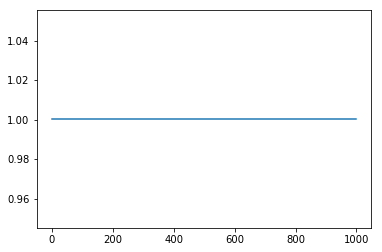

In [160]:
plt.plot(range(len(delta)), delta)